Números normalmente distribuidos

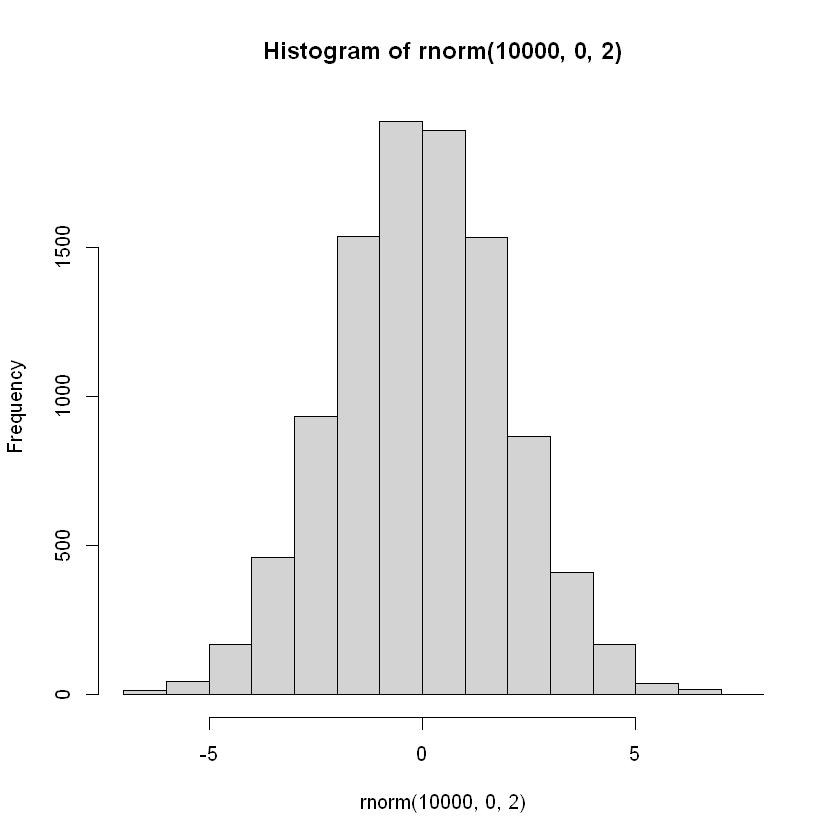

In [1]:
hist(rnorm(10000, 0, 2))

# Prueba de normalidad (Shapiro)

Da valores de $p$ mayores a $0.05$ cuando los datos son normalmente distribuidos.

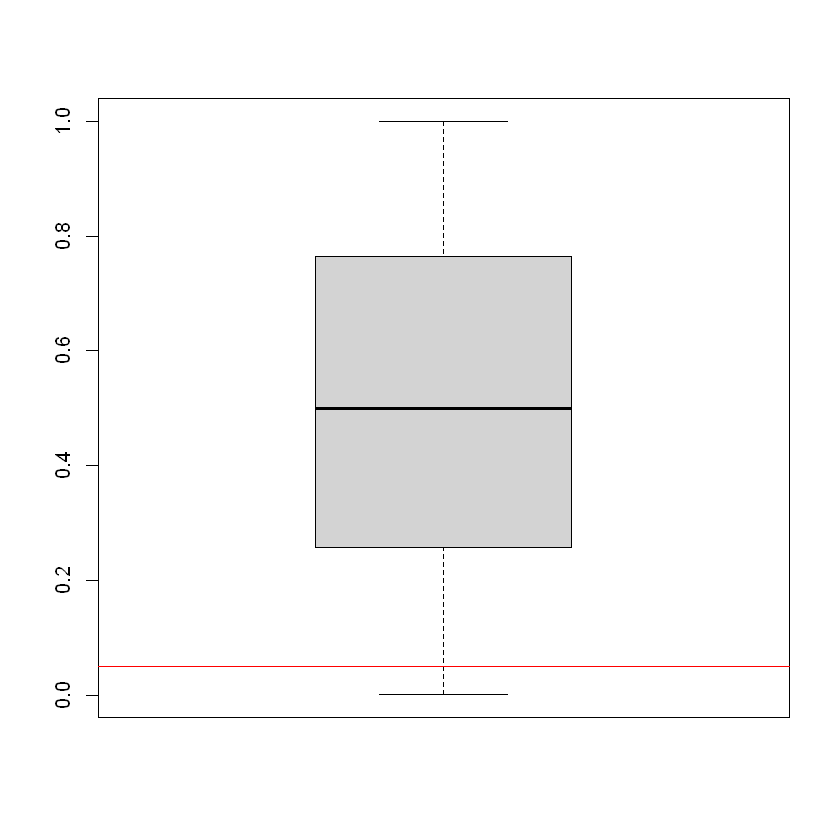

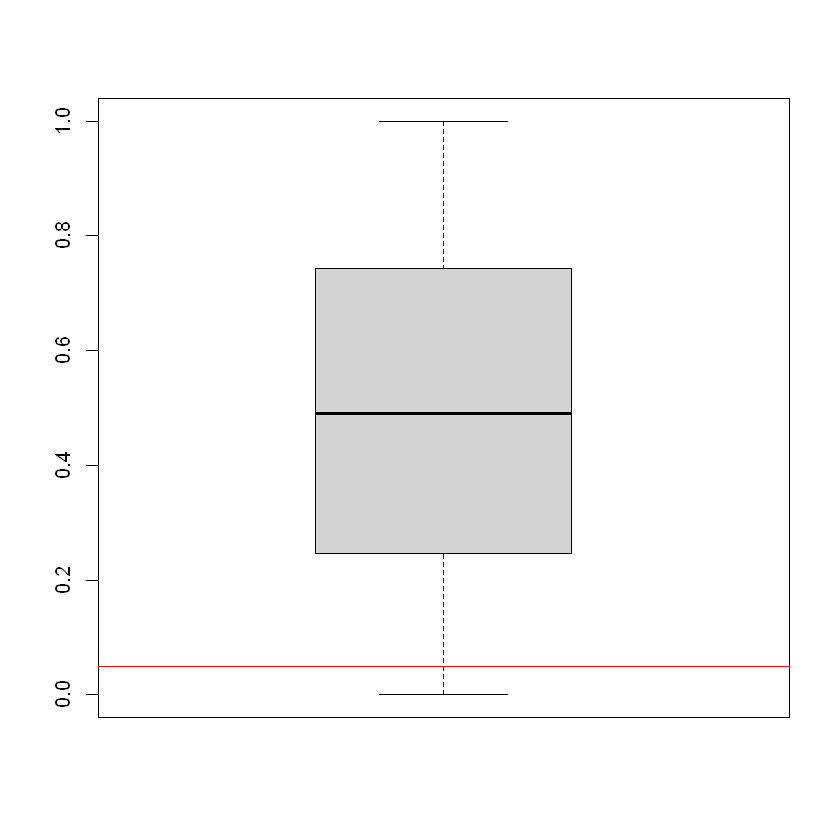

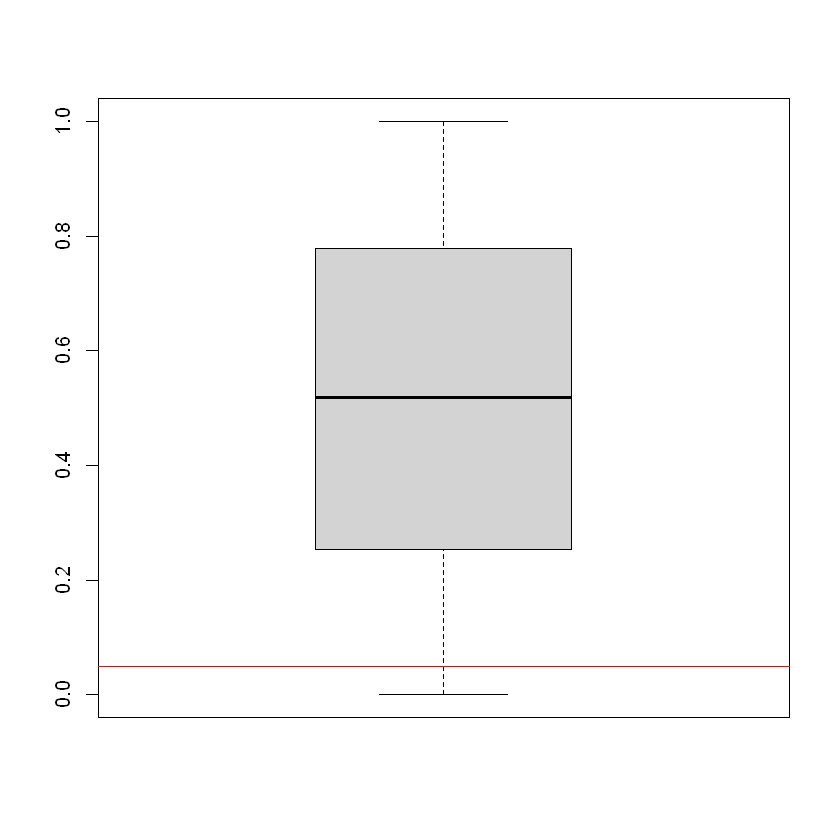

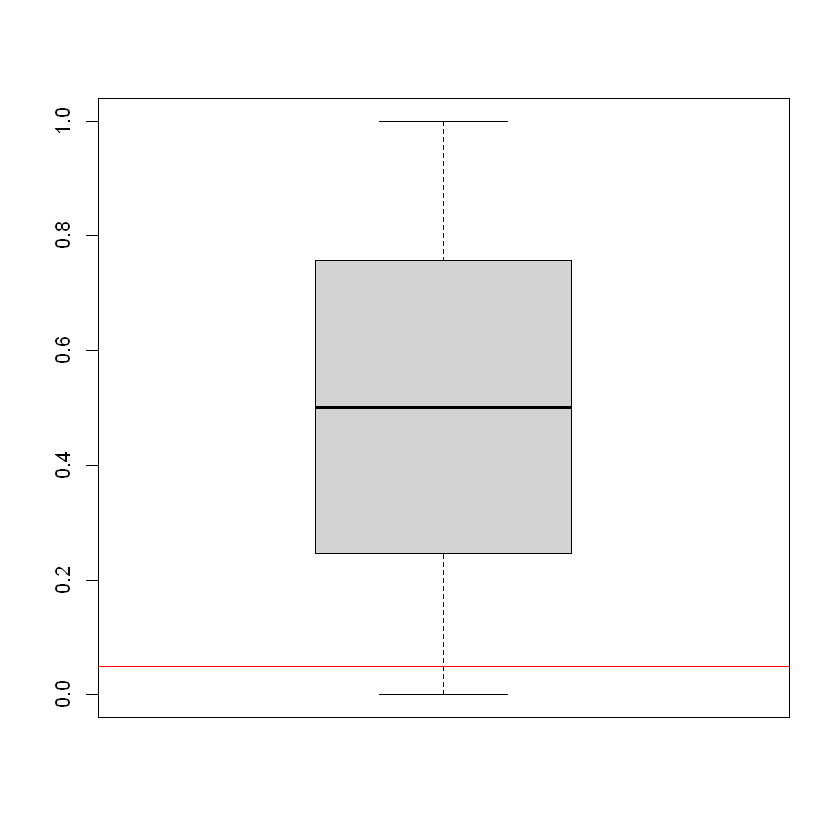

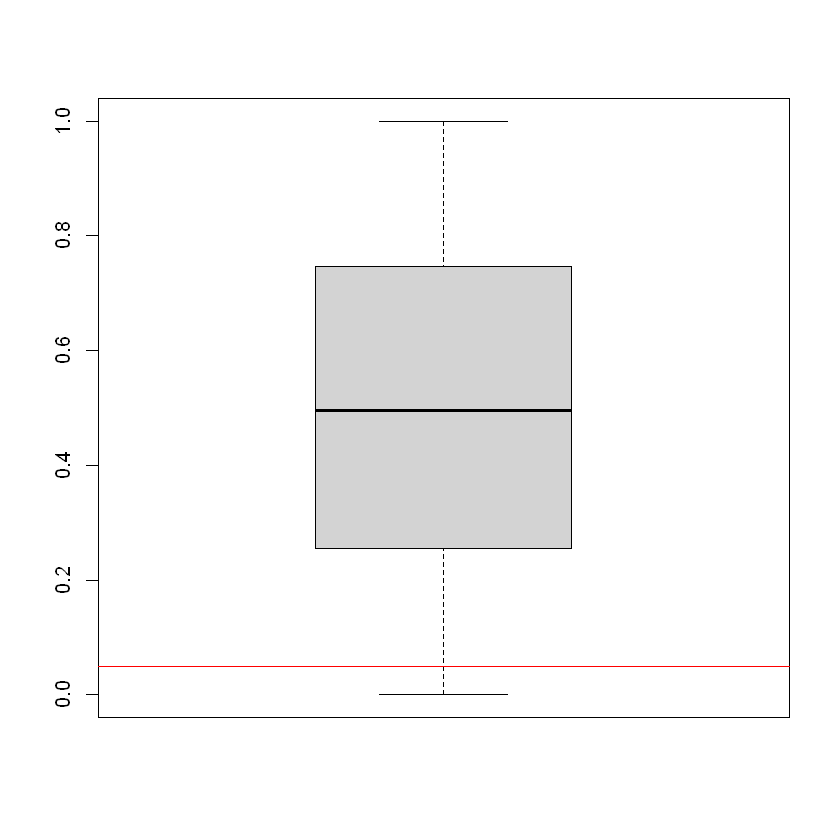

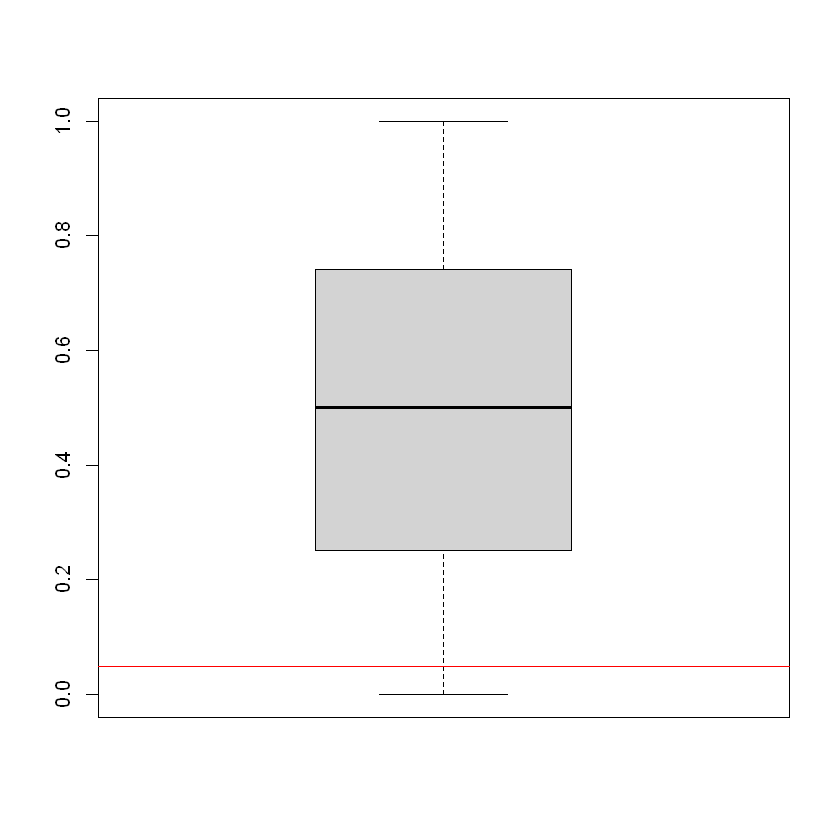

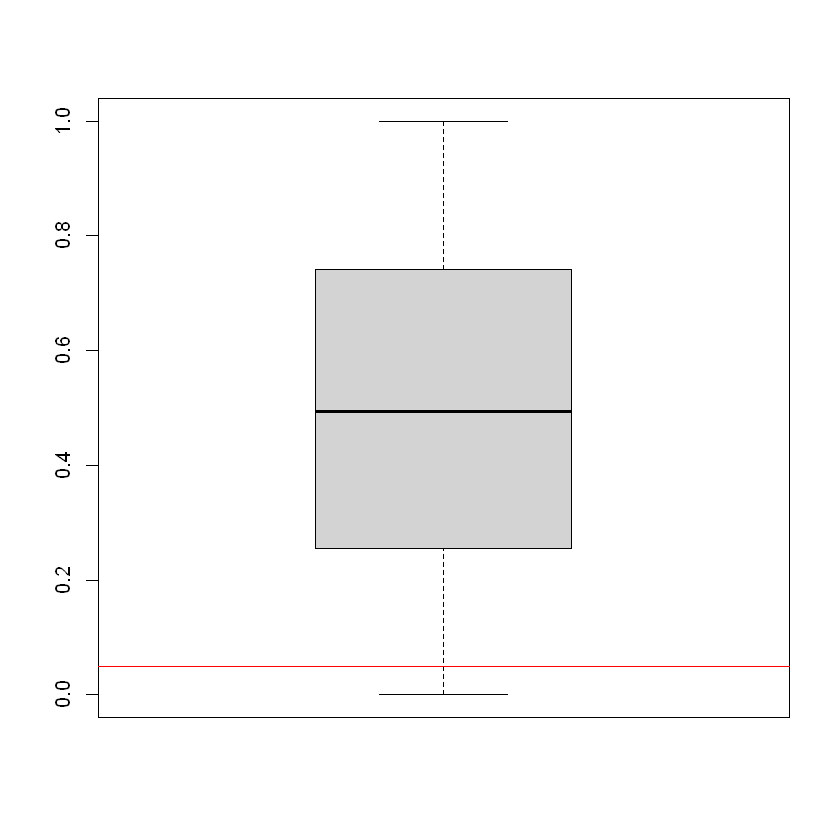

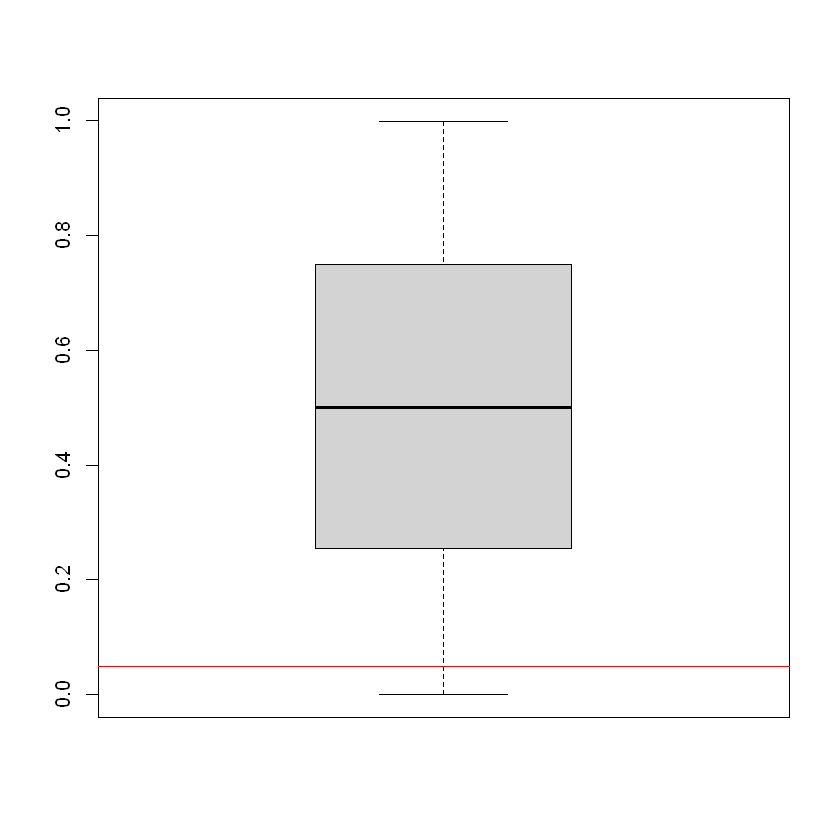

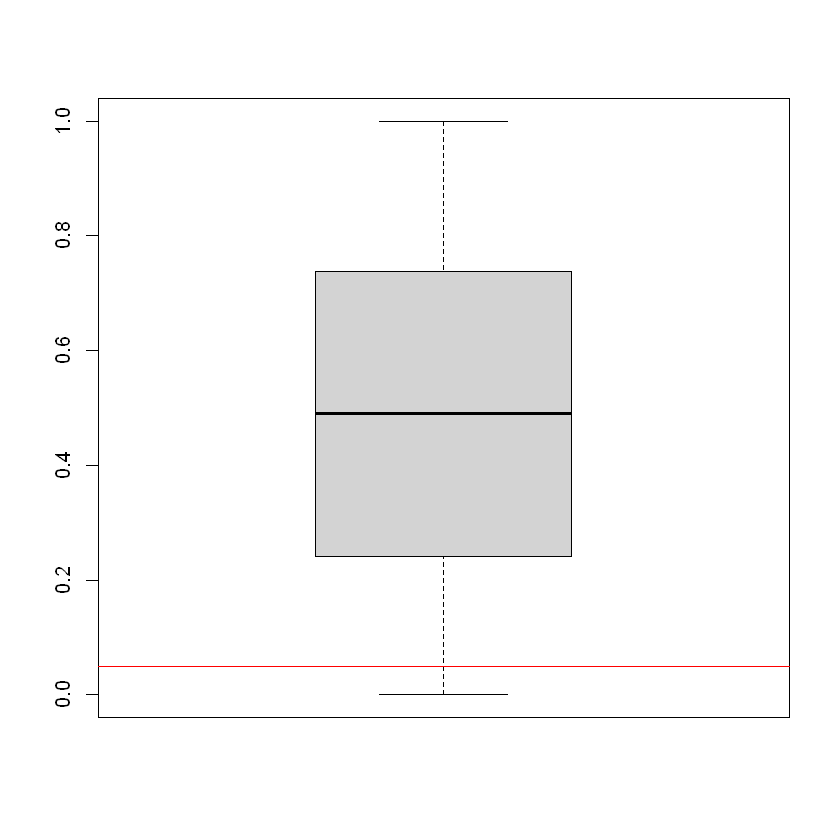

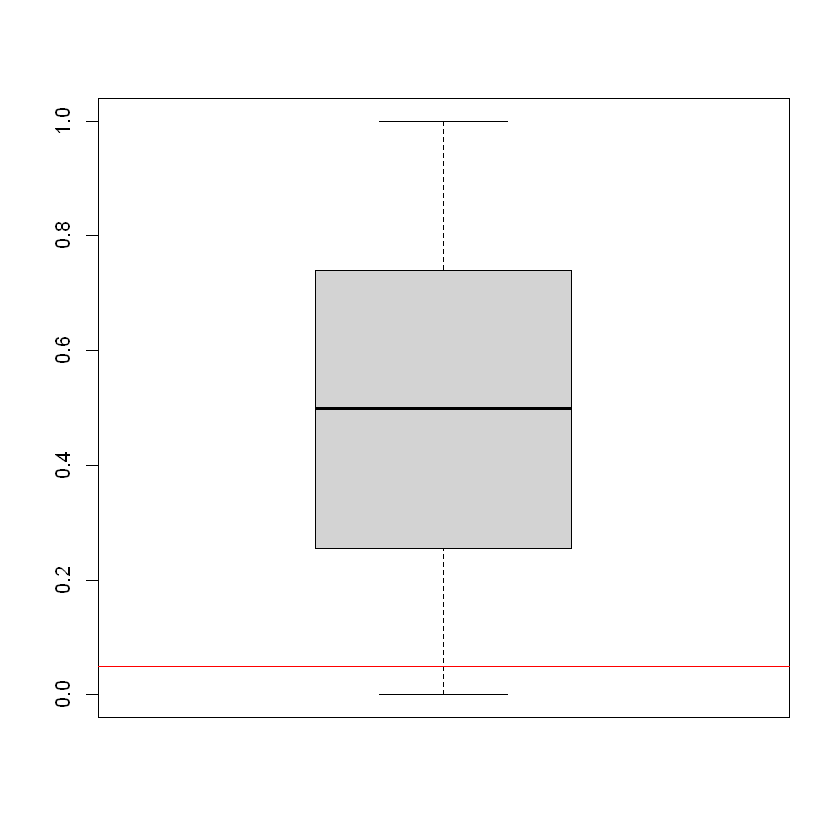

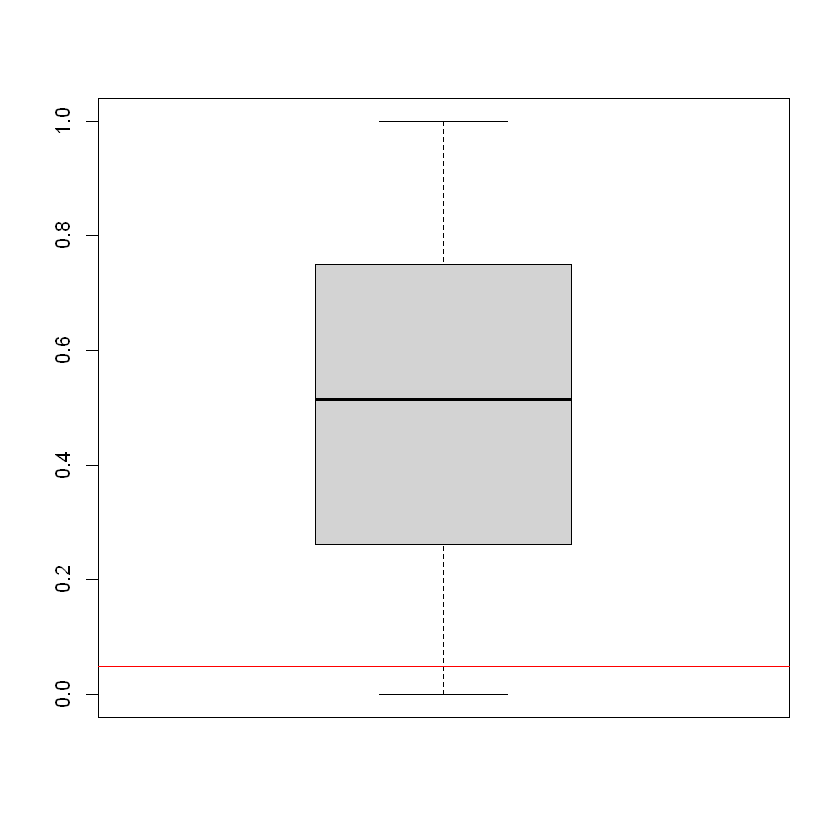

null device 
          1

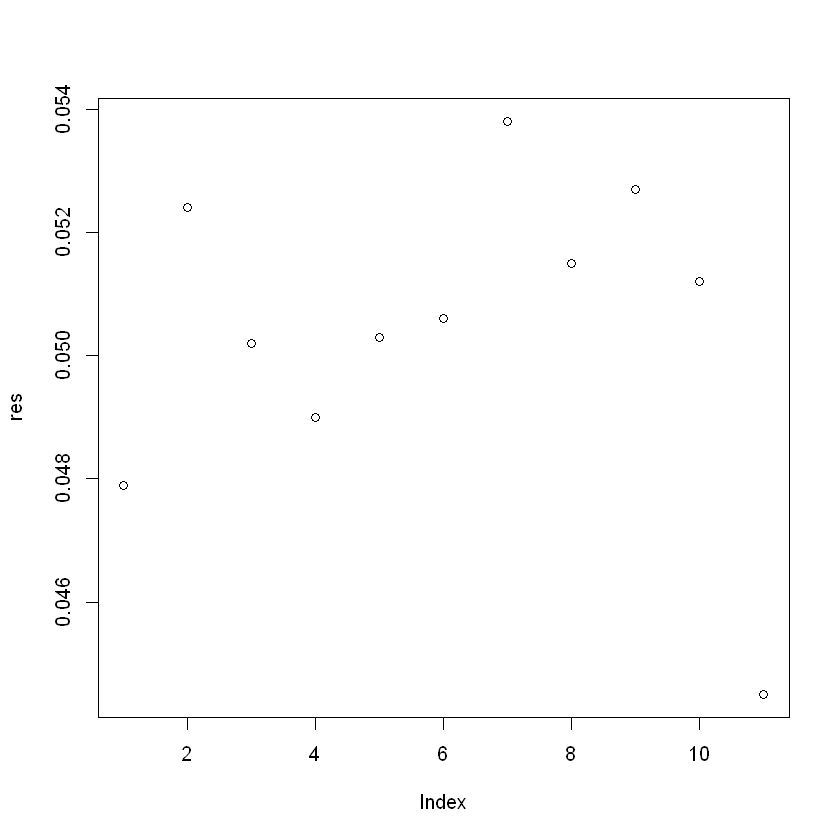

In [59]:
muestras = 10000
base = 2
pot = 12

res = c()
for (i in 2:pot){
    ps = c()    
    for (j in 1:muestras){
        datos = rnorm(base ^ i, 100, 20)
        ps = c(ps, shapiro.test(datos)$p.value)
    }
    boxplot(ps)
    abline(h = 0.05, col="red")
    
    res = c(res, sum(ps < 0.05) / muestras)
}

plot(res)
dev.off()

# Gaussian

In [87]:
gaussian = function(mu, sigma) {
    u = runif(2);
    z0 = sqrt(-2 * log(u[1])) * cos(2 * pi * u[2]);
    z1 = sqrt(-2 * log(u[1])) * sin(2 * pi * u[2]);
    datos = c(z0, z1);
    return (sigma * datos + mu);
}

print(gaussian(0, 1))

[1] -0.4824930 -0.1141924


1. Probar si hay diferencia cualitativa entre $z_0$ y $z_1$.

In [94]:
muestras = 100000
media = 7
desv = 3
res = c()
for (i in 1:muestras){
    res = c(res, gaussian(media, desv))
}


zetas <- data.frame(
    # https://stackoverflow.com/a/17752893/3113008
    matrix(res, nrow = muestras, byrow = TRUE)
)
names(zetas) = c("z0", "z1")

png 
  2

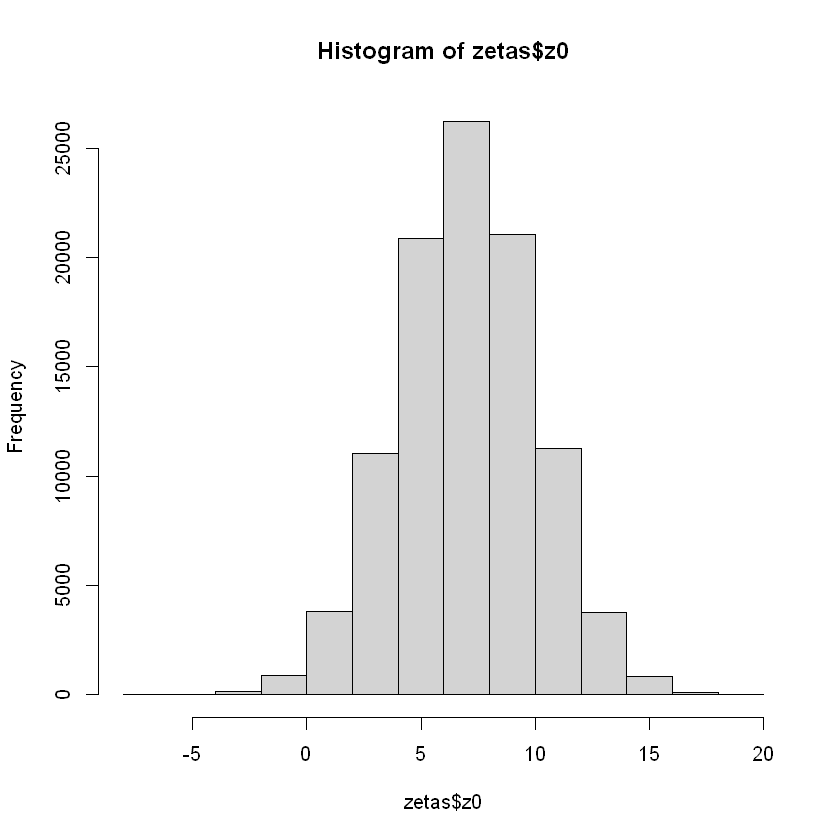

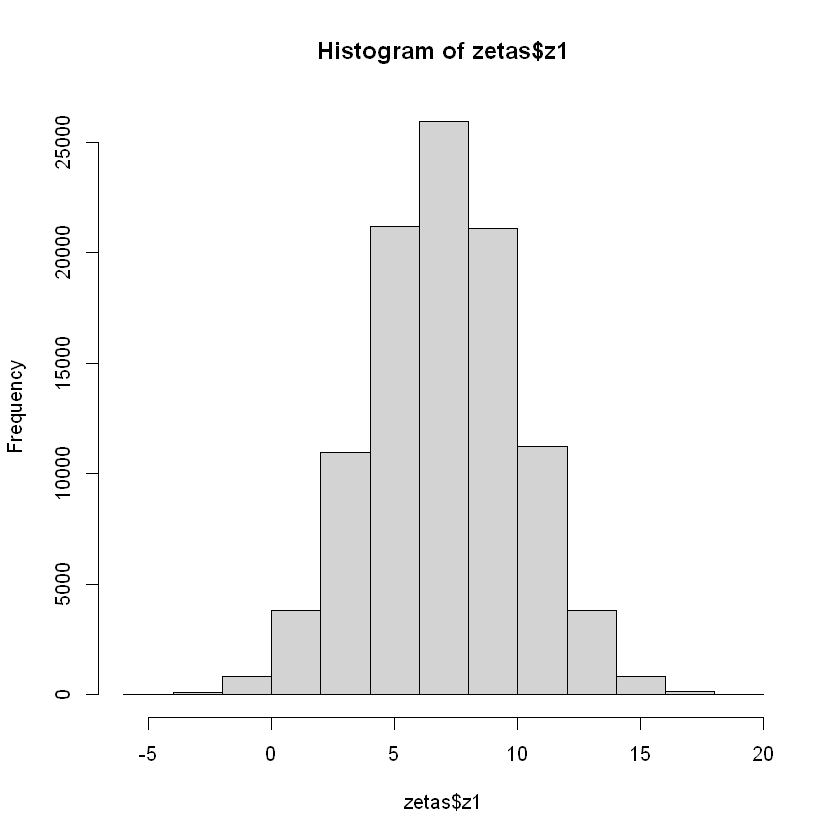

In [105]:
t = list(zetas$z0, zetas$z1)
names(t) = c("z0", "z1")
pdf("gaussian_boxplot.pdf")
boxplot(t, ylab = 'Valor generado', xlab= "Número independiente", cex.lab=1, cex.axis=1)
dev.off()

In [169]:
gaussian_binom = function(mu, sigma) {
    u = rbinom(2, 100, 0.9);
    u = u / max(u)
    z0 = sqrt(-2 * log(u[1])) * cos(2 * pi * u[2]);
    z1 = sqrt(-2 * log(u[1])) * sin(2 * pi * u[2]);
    datos = c(z0);
    return (sigma * datos + mu);
}
gaussian_norm = function(mu, sigma) {
    u = rnorm(2, 0, 1);
    u = u + abs(min(u))
    u = u / max(u)
    z0 = sqrt(-2 * log(u[1])) * cos(2 * pi * u[2]);
    z1 = sqrt(-2 * log(u[1])) * sin(2 * pi * u[2]);
    datos = c(z0);
    return (sigma * datos + mu);
}
gaussian_pois = function(mu, sigma) {
    u = rpois(2, 1000)
    u = u / max(u)
    z0 = sqrt(-2 * log(u[1])) * cos(2 * pi * u[2]);
    z1 = sqrt(-2 * log(u[1])) * sin(2 * pi * u[2]);
    datos = c(z0);
    return (sigma * datos + mu);
}
muestras = 10000
media = 7
desv = 3
res = c()
for (i in 1:muestras){
    res = c(res, gaussian(media, desv))
    res_binom = c(res, gaussian_binom(media, desv))
    res_norm = c(res, gaussian_norm(media, desv))
    res_pois = c(res, gaussian_pois(media, desv))
}

pdf("distribuciones.pdf")
t = list(res, res_binom, res_norm, res_pois)
names(t) = c("Uniforme", "Binomial", "Normal", "Poisson")
boxplot(t, ylab = 'Valor generado', xlab= "Distribución generadora", cex.lab=1, cex.axis=1)
dev.off()

Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
"Outlier (Inf) in boxplot 3 is not drawn"


png 
  2

In [156]:

muestras = 10
media = 7
desv = 3
res = c()


In [156]:
t <- data.frame(
    # https://stackoverflow.com/a/17752893/3113008
    matrix(res, nrow = muestras, byrow = TRUE)
)
names(zetas) = c("z0", "z1")
boxplot(t, ylab = 'Valor generado', xlab= "Número independiente", cex.lab=1, cex.axis=1)

ERROR: Error in names(zetas) = c("z0", "z1"): el atributo 'names' [2] debe tener la misma longitud que el vector [1]


In [164]:
u = rpois(2, 1000)
u / max(u)

[1] 1.0000000 0.9783058

In [223]:
gaussian = function(mu, sigma) {
    u = runif(2);
    z0 = sqrt(-2 * log(u[1])) * cos(2 * pi * u[2]);
    z1 = sqrt(-2 * log(u[1])) * sin(2 * pi * u[2]);
    datos = c(z0, z1);
    return (sigma * datos + mu);
}
gaussian_menos = function(mu, sigma) {
    u = c(runif(1));
    u = c(u, 1 - u[1])
    z0 = sqrt(-2 * log(u[1])) * cos(2 * pi * u[2]);
    z1 = sqrt(-2 * log(u[1])) * sin(2 * pi * u[2]);
    datos = c(z0, z1);
    return (sigma * datos + mu);
}
gaussian_mitad = function(mu, sigma) {
    u = c(runif(1));
    u = c(u, u[1] / 2)
    z0 = sqrt(-2 * log(u[1])) * cos(2 * pi * u[2]);
    z1 = sqrt(-2 * log(u[1])) * sin(2 * pi * u[2]);
    datos = c(z0, z1);
    return (sigma * datos + mu);
}
gaussian_diez = function(mu, sigma) {
    u = c(runif(1));
    u = c(u, u[1] * 0.1)
    z0 = sqrt(-2 * log(u[1])) * cos(2 * pi * u[2]);
    z1 = sqrt(-2 * log(u[1])) * sin(2 * pi * u[2]);
    datos = c(z0, z1);
    return (sigma * datos + mu);
}

gaussian_noventa = function(mu, sigma) {
    u = c(runif(1));
    u = c(u, u[1] * 0.9)
    z0 = sqrt(-2 * log(u[1])) * cos(2 * pi * u[2]);
    z1 = sqrt(-2 * log(u[1])) * sin(2 * pi * u[2]);
    datos = c(z0, z1);
    return (sigma * datos + mu);
}

muestras = 10000
media = 7
desv = 3
res = c()
res_menos = c()
res_mitad = c()
res_diez = c()
res_noventa = c()
for (i in 1:muestras){
    res = c(res, gaussian(media, desv))
    res_menos = c(res_menos, gaussian_menos(media, desv))
    res_mitad = c(res_mitad, gaussian_mitad(media, desv))
    res_diez = c(res_diez, gaussian_diez(media, desv))
    res_noventa = c(res_noventa, gaussian_noventa(media, desv))
}
res <- data.frame(
    # https://stackoverflow.com/a/17752893/3113008
    matrix(res, nrow = muestras, byrow = TRUE)
)
res_menos <- data.frame(
    # https://stackoverflow.com/a/17752893/3113008
    matrix(res_menos, nrow = muestras, byrow = TRUE)
)
res_mitad <- data.frame(
    # https://stackoverflow.com/a/17752893/3113008
    matrix(res_mitad, nrow = muestras, byrow = TRUE)
)
res_diez <- data.frame(
    # https://stackoverflow.com/a/17752893/3113008
    matrix(res_diez, nrow = muestras, byrow = TRUE)
)
res_noventa <- data.frame(
    # https://stackoverflow.com/a/17752893/3113008
    matrix(res_noventa, nrow = muestras, byrow = TRUE)
)

t = c(res[1], res[2], res_menos[1], res_menos[2], res_mitad[1], res_mitad[2], res_diez[1], res_diez[2], res_noventa[1], res_noventa[2])
names(t) = c("z0, U(0, 1)", "z1, U(0, 1)", "z0, 1 - u_1", "z11 - u_1", "z0, u1 / 2", "z1, u1 / 2", "z0, u1 * 0.1", "z1, u1 * 0.1", "z0, u1 * 0.9", "z1, u1 * 0.9")
col = c("red", "red", "lightblue", "lightblue", "orange", "orange", "pink", "pink", "gray", "gray")
pdf("dependientes.pdf")
boxplot(t, ylab = 'Valor generado', cex.lab=1, cex.axis=1, las=2, col = col)
dev.off()

png 
  2

# Uniforme

In [61]:
uniforme = function(n, semilla) {
    a = 11551
    c = 27077
    m = 39709
    datos = numeric()
    x = semilla
    while (length(datos) < n) {
        x = (a * x + c) %% m
        datos = c(datos, x)
    }
    return(datos / (m - 1))
}

summary(uniforme(5000, 27))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0006044 0.2510514 0.4930115 0.5020249 0.7537272 0.9999748 